# **<font color='Midnightblue'>Project: Explore Weather Trends:</font>**

## <font color='SteelBlue'>Description:</font>
    Analyze and compare local and global temperature data.

## <font color='SteelBlue'>Approach:</font>
    
- Extract world and local temperatuture data from database with SQL querries. Export to CSV.
>Two columns from different table cannot show up in joined table if they have the same name. Therefore, wrtie SQL queey to change column names.
 1. ALTER TABLE "city_data" <br>
    RENAME COLUMN "avg_temp" TO "City_temp"<br>
 2. ALTER TABLE "global_data" <br>
    RENAME COLUMN "avg_temp" TO "Global_temp"<br>   


>Now join city_data and global_data tables<br>
 3. select *<br>
from city_data<br>
Join global_data<br>
on city_data.year = global_data.year<br>
Where city = 'San Diego'<br>

>Then export the file and save as result.csv

<br><br>


- Use Python libries to create line chart by ploting the moving average to avoid fluctuation.
>Pleas see the following for Calculate the Moving Average and plots for San Diego vs Global average temperatures. <br>


 



In [1]:
# Import libraries for loading csv file and plotting.
import pandas as pd
from pandas import Series,DataFrame


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load our file and preview the first 5 rows
temp_data = pd.read_csv('temp_result.csv')
temp_data.head()

,year,city,country,City_temp,year.1,Global_temp
0,1849,San Diego,United States,16.03,1849,7.98
1,1850,San Diego,United States,15.55,1850,7.90
2,1851,San Diego,United States,15.66,1851,8.18
3,1852,San Diego,United States,16.06,1852,8.10
4,1853,San Diego,United States,16.69,1853,8.04


In [3]:
#drop duplicated column
temp_data=temp_data.drop('year.1', axis=1)



In [4]:
#Write a function for calculating moving avg
def moving_avg(window_yrs, temp_data):
    temp_data_new = temp_data.rolling(window = window_yrs, on = "year").mean().dropna()
    return temp_data_new

In [5]:
#Decided 30 for the rolling window
rollingWindow = 30
temp_data_movingAverage = moving_avg(rollingWindow, temp_data)

In [6]:
#preview the new data replaced with moving_avg function
temp_data_movingAverage.head()

,year,city,country,City_temp,Global_temp
29,1878,San Diego,United States,16.136000,8.142667
30,1879,San Diego,United States,16.128667,8.149000
31,1880,San Diego,United States,16.099000,8.156333
32,1881,San Diego,United States,16.102667,8.159333
33,1882,San Diego,United States,16.072667,8.160333


In [10]:
temp_data.head()

,year,city,country,City_temp,Global_temp
0,1849,San Diego,United States,16.03,7.98
1,1850,San Diego,United States,15.55,7.90
2,1851,San Diego,United States,15.66,8.18
3,1852,San Diego,United States,16.06,8.10
4,1853,San Diego,United States,16.69,8.04


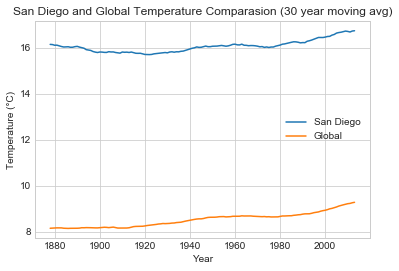

In [161]:
#Now compare the new temp data for Diego with Global 
plt.plot(temp_data_movingAverage['year'], temp_data_movingAverage['City_temp'], label='San Diego')
plt.plot(temp_data_movingAverage['year'], temp_data_movingAverage['Global_temp'], label='Global')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('San Diego and Global Temperature Comparasion ({} year moving avg)'.format(rollingWindow))
plt.show()


## <font color='SteelBlue'>Observations</font>
 1. Is local temperature cooler or hotter than global temperature.<br>
There is a big difference between the global and San Diego average temperatures. From the plot, Diego seems to average about 8°C hotter than global<br><br>
 2. Has the difference been consistent over time?<br>
Yes. San Diego temperature remain about 8°C higher than global temperature beginning of year 1849 through out the latest year.<br><br>
 3. Compare change over time in local and global temperature.<br>
Both temperature are increasing throughout the years except San Diego temperatures were dropping initially. Both temperatures increased about the same at around year ~1920 and ~1975 and has similar tends after year ~1920 <br><br>
 4. Observe overal trends and predict its direction.<br>
Both San Diego and Global temperatures seems continue to increase in future years. By looking at the plot, both temperature has been rising more significantly to year 2000 and beyond. Therefore, it is highly suggested that actions need to be taken to be done. <br><br>



## <font color='255,127,80'>Source:</font>
1.SQL comments aid
- https://www.khanacademy.org/computing/computer-programming/sql/relational-queries-in-sql/pt/joining-related-tables

2.Calculatin the Moving Average
- https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

3.Line plot
- https://matplotlib.org/tutorials/introductory/pyplot.html